In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
path_image = "/home/turgay/Downloads/block_towers/blocks_real/img_concat/"
path_color = "/home/turgay/Downloads/block_towers/blocks_real/mask_color/"
path_order = "/home/turgay/Downloads/block_towers/blocks_real/mask_order/"

In [3]:
dirs_image = sorted(os.listdir(path_image))


In [4]:
dirs_image[:3]

['img_concat_1.png', 'img_concat_10.png', 'img_concat_100.png']

In [5]:
file_path = os.path.join(path, dirs[3])

In [6]:
concatenated_image = Image.open(file_path)

In [7]:
concat_width, concat_height = concatenated_image.size 

concat_width, concat_height


(224, 22400)

In [8]:
num_components = concat_height // 224
num_components

100

In [9]:
img_height, img_width = 224, 224 

In [62]:
if concat_width != img_width or concat_height % img_height != 0:

    print(f"Skipping due to mismatched dimensions.")
    

Skipping due to mismatched dimensions.


In [37]:
#  cropped_image = image.crop((left, upper, right, lower))

components = [
                        concatenated_image.crop((0, i * img_height, img_width, (i+1) * img_height))

                        for i in range(num_components)
                    ]

In [38]:
c = np.array(components)

In [39]:
c.shape

(100, 224, 224, 3)

In [40]:
all_pairs = []

for i in range(len(components) - 1):
    
            img1 = np.array(components[i])
            img2 = np.array(components[i + 1])

            all_pairs.append(np.stack([img1, img2], axis=0))


In [41]:
tensor = np.stack(all_pairs, axis=0)

In [42]:
tensor.shape

(99, 2, 224, 224, 3)

In [7]:
def create_image_pairs(img, colr, ordr, image_shape=(224, 224)):

    path_images     =  sorted(os.listdir(img)) 
    path_colors     =  sorted(os.listdir(colr)) 
    path_orders     =  sorted(os.listdir(ordr)) 
    
    all_pairs = []
    iteration = 0 

    for i, f1, f2, f3 in tqdm(enumerate(zip(path_images, path_colors, path_orders)), total=len(files), desc="Processing files"):
        
        image_path = os.path.join(path_image, f1)
        color_path = os.path.join(path_color, f2)
        order_path = os.path.join(path_order, f3)
        
        try:
            concatenated_image = Image.open(image_path)
        except Exception as e:
            print(f"Error opening {f1}: {e}") 
            continue

        try:
            concatenated_color = Image.open(color_path)
        except Exception as e:
            print(f"Error opening {f2}: {e}") 
            continue

        try:
            concatenated_order = Image.open(order_path)
        except Exception as e:
            print(f"Error opening {f3}: {e}") 
            continue

        concat_width, concat_height = concatenated_image.size 
        img_width, img_height       = image_shape

        if concat_width != img_width or concat_height % img_height != 0:
            print(f"Skipping {file_name} due to mismatched dimensions.")
            continue

        num_components = concat_height // img_width


        component_imgs = [
                        concatenated_image.crop((0, i * img_height, img_width, (i+1) * img_height))

                        for i in range(num_components)
                    ]

        component_colors = [
                        concatenated_color.crop((0, i * img_height, img_width, (i+1) * img_height))

                        for i in range(num_components)
                    ]

        component_orders = [
                        concatenated_order.crop((0, i * img_height, img_width, (i+1) * img_height))

                        for i in range(num_components)
                    ]
        

        for j in range(len(components)-1):
            
            img1 = np.array(component_imgs[j])
            img2 = np.array(component_imgs[j + 1])

            clr1 = np.array(component_colors[j])
            clr2 = np.array(component_colors[j + 1])

            ord1 = np.array(component_orders[j])
            ord2 = np.array(component_orders[j + 1]) 

            all_pairs.append(np.stack([img1, clr1, ord1, img2, clr2, ord2], axis=0))
            
        
        if (i + 1) % 200 == 0 or i + 1 == len(files):
            
            num    =  np.str_(i + 1)
            tensor =  np.stack(all_pairs, axis=0)
            name   =  f"block_data{num}.npy"
            print(name, " is being saved...")
            np.save(name, tensor) 
            print(name, " was succesfully saved.")
            all_pairs = []



In [4]:
def create_image_pairs(img, colr, ordr, image_shape=(224, 224)):
    
    path_images = sorted(os.listdir(img))
    path_colors = sorted(os.listdir(colr))
    path_orders = sorted(os.listdir(ordr))

    all_pairs   = []
    iteration   = 0

    for i, (f1, f2, f3) in tqdm(enumerate(zip(path_images, path_colors, path_orders)), total=len(path_images), desc="Processing files"):
        
        image_path = os.path.join(img, f1)
        color_path = os.path.join(colr, f2)
        order_path = os.path.join(ordr, f3)

        try:
            concatenated_image = Image.open(image_path)
        except Exception as e:
            print(f"Error opening {f1}: {e}")
            continue

        try:
            concatenated_color = Image.open(color_path)
        except Exception as e:
            print(f"Error opening {f2}: {e}")
            continue

        try:
            concatenated_order = Image.open(order_path)
        except Exception as e:
            print(f"Error opening {f3}: {e}")
            continue

        concat_width, concat_height = concatenated_image.size
        img_width, img_height       = image_shape

        if concat_width != img_width or concat_height % img_height != 0:
            print(f"Skipping {f1} due to mismatched dimensions.")
            continue

        num_components    = concat_height // img_height

        component_imgs    = [concatenated_image.crop((0, i * img_height, img_width, (i + 1) * img_height)) for i in range(num_components)]
        component_colors  = [concatenated_color.crop((0, i * img_height, img_width, (i + 1) * img_height)) for i in range(num_components)]
        component_orders  = [concatenated_order.crop((0, i * img_height, img_width, (i + 1) * img_height)) for i in range(num_components)]

        for j in range(len(component_imgs) - 1):
            img1 = np.array(component_imgs[j])
            img2 = np.array(component_imgs[j + 1])

            clr1 = np.array(component_colors[j])
            clr2 = np.array(component_colors[j + 1])

            ord1 = np.array(component_orders[j])
            ord2 = np.array(component_orders[j + 1])

            all_pairs.append(np.stack([img1, clr1, ord1, img2, clr2, ord2], axis=0))

        if (i + 1) % 50 == 0 or i + 1 == len(path_images):
            num    = str(i + 1)
            tensor = np.stack(all_pairs, axis=0)
            name   = f"block_data{num}.npy"
            print(name, "is being saved...")
            np.save(name, tensor)
            print(name, "was successfully saved.")
            all_pairs = []


In [7]:
create_image_pairs(path_image, path_color, path_order)

Processing files:   9%|▉         | 49/516 [00:08<01:10,  6.59it/s]

block_data50.npy is being saved...


Processing files:  10%|▉         | 50/516 [00:10<06:21,  1.22it/s]

block_data50.npy was successfully saved.


Processing files:  19%|█▉        | 99/516 [00:17<01:12,  5.78it/s]

block_data100.npy is being saved...


Processing files:  19%|█▉        | 100/516 [00:59<1:27:48, 12.67s/it]

block_data100.npy was successfully saved.


Processing files:  29%|██▉       | 149/516 [01:15<00:55,  6.61it/s]  

block_data150.npy is being saved...


Processing files:  29%|██▉       | 150/516 [01:39<25:57,  4.26s/it]

block_data150.npy was successfully saved.


Processing files:  39%|███▊      | 199/516 [01:57<00:45,  6.99it/s]

block_data200.npy is being saved...


Processing files:  39%|███▉      | 200/516 [02:00<04:17,  1.23it/s]

block_data200.npy was successfully saved.


Processing files:  48%|████▊     | 249/516 [02:16<00:34,  7.82it/s]

block_data250.npy is being saved...


Processing files:  48%|████▊     | 250/516 [02:30<16:06,  3.63s/it]

block_data250.npy was successfully saved.


Processing files:  58%|█████▊    | 298/516 [02:44<00:22,  9.71it/s]

block_data300.npy is being saved...


Processing files:  58%|█████▊    | 300/516 [03:00<08:54,  2.47s/it]

block_data300.npy was successfully saved.


Processing files:  68%|██████▊   | 349/516 [03:13<00:29,  5.59it/s]

block_data350.npy is being saved...


Processing files:  68%|██████▊   | 350/516 [03:45<21:46,  7.87s/it]

block_data350.npy was successfully saved.


Processing files:  77%|███████▋  | 399/516 [04:08<00:12,  9.20it/s]

block_data400.npy is being saved...


Processing files:  78%|███████▊  | 400/516 [04:14<02:05,  1.08s/it]

block_data400.npy was successfully saved.


Processing files:  87%|████████▋ | 449/516 [04:26<00:05, 11.20it/s]

block_data450.npy is being saved...


Processing files:  87%|████████▋ | 450/516 [04:52<05:34,  5.06s/it]

block_data450.npy was successfully saved.


Processing files:  97%|█████████▋| 499/516 [05:02<00:01,  8.77it/s]

block_data500.npy is being saved...


Processing files:  97%|█████████▋| 500/516 [05:11<00:35,  2.20s/it]

block_data500.npy was successfully saved.


Processing files: 100%|█████████▉| 515/516 [05:24<00:00,  1.44it/s]

block_data516.npy is being saved...


Processing files: 100%|██████████| 516/516 [05:26<00:00,  1.58it/s]

block_data516.npy was successfully saved.


In [5]:
data_path  =  "/home/turgay/Turgay/Academic/2024-2025/Fall/Generative_Models/Final_Project/Codes/Synthetic_data_generate/"

In [6]:
data = sorted(os.listdir(data_path))
data

['.ipynb_checkpoints',
 '.jupyter',
 '.virtual_documents',
 'block_data.ipynb',
 'block_data100.npy',
 'block_data150.npy',
 'block_data200.npy',
 'block_data250.npy',
 'block_data300.npy',
 'block_data350.npy',
 'block_data400.npy',
 'block_data450.npy',
 'block_data50.npy',
 'block_data500.npy',
 'block_data516.npy',
 'concatenated_data.npy',
 'csv',
 'images',
 'newton_2.ipynb',
 'newton_latent_create_data.ipynb']

In [13]:
path_1  =  data_path + "block_data50.npy"
path_2  =  data_path + "block_data100.npy"
path_3  =  data_path + "block_data150.npy"
path_4  =  data_path + "block_data200.npy"
path_5  =  data_path + "block_data250.npy"
path_6  =  data_path + "block_data300.npy"
path_7  =  data_path + "block_data350.npy"
path_8  =  data_path + "block_data400.npy"
path_9  =  data_path + "block_data450.npy"
path_10  =  data_path + "block_data500.npy"
path_11  =  data_path + "block_data516.npy"

In [14]:
data_1 = np.load(path_1, mmap_mode="r")
data_2 = np.load(path_2, mmap_mode="r")
data_3 = np.load(path_3, mmap_mode="r")
data_4 = np.load(path_4, mmap_mode="r")
data_5 = np.load(path_5, mmap_mode="r")
data_6 = np.load(path_6, mmap_mode="r")
data_7 = np.load(path_7, mmap_mode="r")
data_8 = np.load(path_8, mmap_mode="r")
data_9 = np.load(path_9, mmap_mode="r")
data_10 = np.load(path_10, mmap_mode="r")
data_11 = np.load(path_11, mmap_mode="r")

In [15]:
output_path = data_path + "concatenated_data.npy"

np.save(output_path, data_1)

In [16]:
def append_to_file(data_path, data_to_append):
    with open(data_path, 'ab') as f:  # 'ab' mode to append in binary format
        np.save(f, data_to_append)

In [23]:
datas  =  [
  data_1 ,
  data_2 ,
  data_3 ,
  data_4 ,
  data_5 ,
  data_6 ,
  data_7 ,
  data_8 ,
  data_9 ,
  data_10 ,
  data_11 ]

In [24]:
for data in datas:
    
    append_to_file(output_path, data)

In [18]:
new  =  np.concatenate((data_1, data_2))

In [19]:
new.shape

(4760, 6, 224, 224, 3)

In [11]:
def plot_img(data, row, col, size1, size2, c_map = None): 
    if (row == 1) and (col == 1): 
        fig, ax = plt.subplots(1, 1, figsize=(size1, size2))
        ax.imshow(data, cmap=c_map) 
        ax.set_axis_off() 

    elif (row == 1) and (col > 1):
        fig, axes = plt.subplots(1, col, figsize=(size1, size2))
        for i in range(col):
            axes[i].imshow(data[i], cmap=c_map) 
            axes[i].set_axis_off() 
            axes[i].set_title(f"Image {i}")

    else:
        fig, axes = plt.subplots(row, col, figsize=(size1, size2))
        axes = axes.flatten()  # Flatten the axes to make indexing easier
        for i in range(row * col):
            if i < len(data):  # Ensure you do not exceed the length of data
                axes[i].imshow(data[i], cmap=c_map) 
                axes[i].set_axis_off()  
                axes[i].set_title(f"Image {i}")
            else:
                axes[i].axis('off')  # Turn off unused axes

    plt.tight_layout()  
    plt.show()


In [7]:
path_12  =  data_path + "concatenated_data.npy"

In [8]:
data_12  =  np.load(path_12, mmap_mode="r")

In [9]:
data_12.shape

(3529, 6, 224, 224, 3)

In [27]:
data_temp_0  = data_12[:10, 1, :, :, :]

In [26]:
data_temp_0 = (data_temp_0 - data_temp_0.min()) / (data_temp_0.max() - data_temp_0.min())

NameError: name 'data_temp_0' is not defined

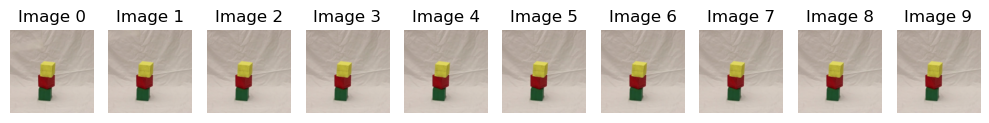

In [17]:
plot_img(data_12[:10, 0, :, :, :] , 1, 10, 10, 10)

In [18]:
data_temp  = data_12[:10, 1, :, :, :]

In [19]:
data_temp = (data_temp - data_temp.min()) / (data_temp.max() - data_temp.min())

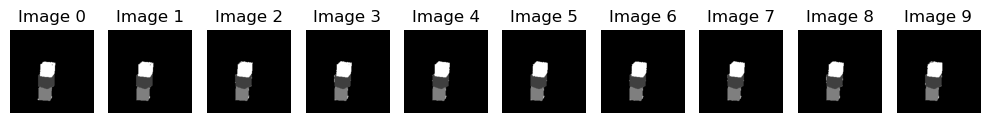

In [20]:
plot_img(data_temp , 1, 10, 10, 10)

In [21]:
data_temp2  = data_12[:10, 2, :, :, :]

In [24]:
data_temp2 = (data_temp2 - data_temp2.min()) / (data_temp2.max() - data_temp2.min())

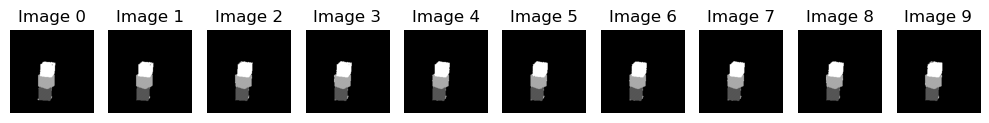

In [25]:
plot_img(data_temp2, 1, 10, 10, 10)

In [130]:
data_temp  =  data_1[70:80]
data_temp.shape

(10, 2, 224, 224, 3)

In [131]:
data_temp  =  data_temp.reshape(-1, 224, 224, 3)
data_temp.shape

(20, 224, 224, 3)

In [132]:
data_temp = (data_temp - data_temp.min()) / (data_temp.max() - data_temp.min())

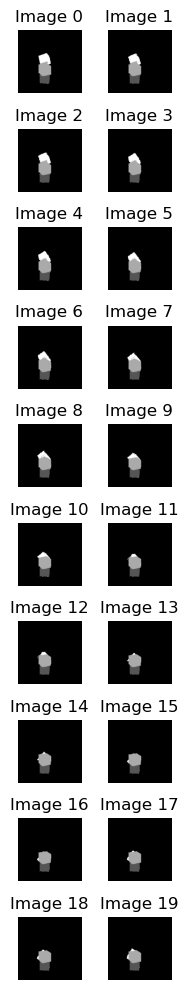

In [133]:
plot_img(data_temp, 10, 2,  2,  10)